# Modeling and Pricing Temperature Derivatives with Historical and AR(1) Residuals

##### Aryan Chatterjee 


# Abstract 

This project presents a data-driven framework for pricing temperature-linked derivatives, specifically contracts based on Cooling Degree Days (CDDs). Motivated by real-world hedging needs in the energy and insurance sectors, we develop a regime-aware pricing model grounded in conditional expectation theory. The methodology relies on simulating temperature paths using Monte Carlo techniques, employing both i.i.d. and AR(1) residual models, and comparing them against a benchmark derived from historical CDD distributions.

We evaluate each model based on pricing accuracy, probabilistic confidence intervals, and out-of-sample robustness. Surprisingly, our findings suggest that i.i.d. noise models outperform AR(1)-based approaches in certain regimes despite the latter’s theoretical alignment with temperature autocorrelation. The final model not only predicts contract prices within a tight error margin but also provides actionable bounds for trade execution, enhancing real-world decision-making. 

# Introduction

Weather plays a critical role in the operations and financial performance of numerous industries. For instance, an energy company in Canada may wish to hedge against abnormally warm winters, while agricultural or insurance firms may be vulnerable to seasonal temperature anomalies. To manage this risk, **weather derivatives**—contracts that provide payouts based on weather indices—have become effective tools.

Among these, **temperature derivatives** are the most widely used. These contracts typically pay out based on either **Heating Degree Days (HDD)** or **Cooling Degree Days (CDD)**, which are metrics that measure how far and for how long the daily temperature deviates from a base threshold.

In this research, we approach the pricing problem from the perspective of a **heating energy provider in Chicago**. Our objective is to hedge against reduced revenue during the **summer months**, when demand for heating is naturally low. To do this, we aim to price **CDD derivatives** for the months **May through August**, using a simulation-based approach that incorporates historical structure and regime-aware behavior.

Rather than relying solely on historical data, we propose a **Monte Carlo approach**. This method integrates observed seasonal behavior, regime forecasts (e.g., unusually hot summer), to generate plausible future temperature paths. This leads to more accurate estimation of potential outcomes—and therefore, more robust pricing of weather derivatives.

A typical payoff function for a temperature derivative is as follows :

$$ T_i = \frac{T_{\text{max}} + T_{\text{min}}}{2} $$

Let $T_b$ be the benchmark temperature (typically around 65°F or 18°C). The indices are defined as:

- $$ \text{HDD}_i = \max(T_b - T_i, 0)  — \text{measures the need for heating} $$
- $$ \text{CDD}_i = \max(T_i - T_b, 0)  — \text{measures the need for cooling} $$

The cumulative index over a contract window is:

$$ H = \sum_{i=1}^n \text{HDD}_i \quad \text{or} \quad C = \sum_{i=1}^n \text{CDD}_i $$

A common option-like payoff structure is:

$$ \text{Payoff} = \alpha \cdot \max(H - K, 0) $$

Where:
- $ \alpha $ is the notional amount
- $ K $ is the strike (threshold HDD/CDD)

These contracts take various forms, including **options**, **futures**, and **swaps**, and are often customized to suit specific hedging needs.

# Methodology

The method followed consists of 3 distinct steps as outlined below. 

##### 1. Coming up with a pricing theory

We price temperature derivates from the point of view of someone who is trying to hedge against weather risk. The derivate is priced in such a way that the estimated loss is 0 in the end. The pricing theory relies heavily on the estimation of a probability distribution function ($f_X(x)$) for the CDDs .

##### 2. Estimating the probability distribution function of CDDs

Three different models are proposed to aid in function estimation

- Model 1 : Monte Carlo Simulator with i.i.d noise 
- Model 2 : Monte Carlo Simulator with AR(1) noise
- Model 3 : Historical CDD Sampler (Benchmark model)

##### 3. Model evaluation

Models are evaluated on in-sample as well as out-of-sample data. Evaluations are done on the following 4 factors : 

1. Mean absolute pricing error 
    - By how much was the model off on average . 
    - Being off here is defined as the absolute value of the difference between the estimated price and the actual price which would have led to 0 loss
2. Probability of pricing error being within a certain percentage 
4. Hedging effectiveness
    - It is not necessary that a trade will be possible exactly at the price which the model prescribes
    - Assuming trades are placed at the price which the model prescribes , how much loss is averted and what is the cost benefit of that loss aversion ?
    - In what band of prices around the prescribed price can trades be placed such that there is a reasonable expectation of loss aversion and cost benefit. Basically , what is the maximum price a trader who is using the model should settle for ?

Hedging effectiveness is only checked for the model which performs the best on the first 3 criteria on out-of-sample data

All 3 steps of the methodology are described in detail in the following sections

## Pricing theory


The PnL function for the CDD derivative is as follows :

$$ \text{Gain} = \alpha . max(X - K , 0) - C $$

Where $ C $ is the cost of the derivative.

We think in terms of hedging out our loss. So given a formula for loss and a formula for the payoff , the price has to be set such that net loss = 0 .

We can assume that the heating provider makes a certain loss for every CDD over a certain threshold , else there is no loss . This loss function would also look like a derivative 

Thus, the function which denotes the loss incurred by the energy company would be as follows. Note, that we assume the same strike $ K $ for simplicity

$$ \text{Loss} = \lambda . max(X - K, 0) $$

We need hedge in such a way that the expected loss equals the expected gain

$$ \mathbb{E}[Loss] = \mathbb{E}[Gain] $$

$$ \mathbb{E}[\lambda . (X - K) | X > K] = \mathbb{E}[\alpha . (X - K | X > K)] - C $$

$$ C = \mathbb{E}[\alpha . (X - K ) | X > K] - \mathbb{E}[\lambda . (X - K) | X > K] $$

$$ C = \mathbb{E}[(\alpha - \lambda)(X - K) | X > K] $$

$$  C = (\alpha - \lambda) . (\frac{\int_{K}^{\infty} x f_X(x) \, dx}{\int_{K}^{\infty} f_X(x) \, dx}   - K)$$



$$ \text{We can say that C is parameterized by } X,K,\alpha,\lambda $$

$$ Thus , C = G(X,K,\alpha,\lambda) $$

## Estimating the Probability Density Function $f_X(x)$

Estimating the Probability Density Function is the crux of the problem here . Given such a function , simple numerical integration can be done to provide a price estimate. 

### Regime awareness

A regime is defined as a percentile band. Weather forecasters are capable of providing seasonal forecasts regarding the percentile severity of a season. For example, *** the coming summer would be in the top 10 percentile in terms of heat as compared to historically seen summers *** . This is the most important insight which is to be used in pricing of weather derivatives. Because such forecasts are provided much before the season, they provide critical information to players trying to hedge out weather risk . 

This paper however does not bother with trying to go into details of ascertaining whether or not a regime forecast is correct or the degree of its correctness. Model training and evaluation is done assuming that the regime has been correctly predicted. 

However , the probability of the regime forecast being correct , can be calculated using factors such as ocean currents data , historical accuracy of the weather station, etc.

### Historical data

Historical data is also an important tool concerning generation of the density function . Historically seen CDD values give us a broad overview of what to expect the weather to be like in a particular city or area. Although useful , there is a big caveat here . Enough historical data is not available to capture all possibilities of the CDD values. If we are trying to hedge out weather risk in the summer season over the city of Chicago , we will only have a single CDD value and its corresponding daily temperature data for the concerned window per year , going back to N years. Practically speaking, N will never be large enough for the historical data to suffice by itself and stand the pressure of out-of-sample tests.

### Data generation

Historical data is used as a seeding agent for generating distributions which can withstand out-of-sample testing. Firstly , a sine wave is fit to daily temperature data . This wave acts as a baseline for our simulated temperature paths. Next, **Monte Carlo Simulations** are performed to generate CDD values. 

Two different noise methods are used in these simulations are their effectiveness compared while evaluating the models :

1. Method 1 : i.i.d noise

Historical residuals are calculated . A Gaussian KDE distribution is created for these residuals . For each simulated path , a path of i.i.d noise is created by sampling from the residual distribution. 

2. Method 2 : AR(1) noise

Autoregressive noise is more realistic for temperature paths. If temperature is high one day, the chances that it will oscillate wildly in the opposite direction the next day is low. Although AR(1) noise may converge over multiple simulations into i.i.d noise , because of the path dependence of CDD values, we still consider evaluating this method. 

In addition to the 2 models outlined above, a 3rd benchmark model is also made . The benchmark model merely takes in historical CDD values and fits a distribution to them.

Models created :

1. Monte Carlo Simulator with i.i.d noise sampled from a generated historical residuals distribution (Version 1)
2. Monte Carlo Simulator with AR(1) noise generated by fitting values to historically observed temperature paths (Version 2)
3. Historical CDD Sampler (Version 3 - Benchmark)

It is important to note , that all 3 models are regime aware . That is, they create seperate distributions for each regime considered . Naturally, they also take in the regime as input when pricing the temperature security



### Defining in-sample and out-of-sample data

Data is collected using the meteostate library for the city of Chicago 

- In Sample refers to data from Jan 1st 1980 to Jan 1st 2005
- Out of Sample refers to data from Jan 1st 2005 to Jan 1st 2025

The proposed and benchmark models are trained on the in-sample data and their performance is evaluated on both in-sample as well as out-of-sample data

### Step by step method to generate a probability density function

#### 1. Sine curve fitting

A sine curve is fit to historical daily temperature data for the city of chicago . The sine curve acts as our baseline for residuals calculation and Monte Carlo path simulations for temperature.

#### 2. Regime wise CDD sampling

Historical CDD values are first sampled as per the regime and put into the regime buckets.

#### 3. Creating a historical seed distribution

For each regime bucket , a Gaussian KDE is fit . These distributions act as the sole reference point for the benchmark model.

#### 4. Monte Carlo Simulations

For model versions 1 and 2 , Monte Carlo Simulations must be performed to enhance the seed distribution. The simulation method may either be i.i.d noise based or AR(1) noise based.

1. Model 1 :

    The following steps are run for each regime bucket. 

    - CDD values are fetched
    - Historical temperature paths for the corresponding values are fetched
    - Residuals are calculated for each path . $ \epsilon _i  = T_i - \mu_i $ . Where $\epsilon$ is the residual (noise value) , $T_i$ is the temperature for day i and $\mu_i$ is the sine wave value for day i
    - A Gaussian KDE is fit on the historical residuals found
    - For each simulation :
        - A noise path of length equal to the length of the concerned window is created by sampling values from the residuals distribution
        - Noise values are added to the sine wave over the window 
        - CDD value is calculated for the simulated path 
    - A Gaussian KDE is fit over the CDD values thus simulated

2. Model 2 :

    The following steps are run for each regime bucket

    - CDD values are fetched
    - Historical temperature paths for the corresponding values are fetched
    - Residual path for each temperature path is calculated using the formula $ \epsilon _i  = T_i - \mu_i $
    - An AR(1) model is fit to the residual path
    - A numer of AR(1) noise paths are generated and added to the sine wave to get final temperature paths
    - CDD for each simulated temperature path is calculated
    - A Gaussian KDE is fit over the CDD values thus simulated

## Model Evaluation 

A Gaussian KDE is fit to in-sample or out-of-sample data . N CDD values are sampled as per the regime and the following metrics are calculated . The metrics are calculated per regime. 

### Mean absolute pricing error 

$$ C_{actual} = \text{ actual price which would perfectly offset the loss}\ $$

$$ C_{estimated} = \text{ estimated price by the model} $$

$$ E_i = \frac{| C_{\text{actual i}} - C_{\text{estimated for regime}}| }{C_{\text{actual i}}} $$

$$ E = \frac{1}{N} . \sum_{i}^{N} E_i $$

### Probability that the mispricing falls within a significance value 

  $$ \nu = \text{ value below which the mispricing must be} $$

  $$ S_i = 1 \text{ ; if   } E_i <= \nu  $$

  $$ S_i = 0 \text{ ; else } $$

  $$ S = \frac{1}{N} . \sum_{i}^{N} S_i $$

For the sake of adding clarity to discussion , we choose 2 values for $ \nu $ : 0.1 and 0.2

### Hedging usefulness

Model which performs the best on out-of-sample data in the 2 above metrics , is then chosen for this step. It is important to note that the models are not trying to predict the price exactly . The purpose of the model is to provide an estimate for the price to be paid for a CDD temperature in order to offset weather risk .

#### Protection against loss 


$$ Loss_{unhedged} = \lambda . max(CDD-K,0) $$

$$ Loss_{hedged} = \lambda . max(CDD-K,0) - \alpha . max(CDD-K,0) + C_{paid} $$

$$ Loss_{averted} = \frac{Loss_{unhedged} - Loss_{hedged}}{Loss_{unhedged}}  $$

$$ L = \frac{1}{N} . \sum_{i}^{N} Loss_{\text{averted i}} $$



#### Cost benefit 


$$ CB_i = Loss_{\text{averted i}} / C_{paid} $$

$$ CB = \frac{1}{N} . \sum_{i}^{N} CB_i $$

#### Probability of effective hedge 

$$ P_i = 1 \text{ if } CB_i >= \varphi  $$

$$ P_i = 0 \text{ else } $$

$$ P = \frac{1}{N} . \sum_{i}^{N} P_i $$

The above 3 metrics are calculated under 2 scenarios :

1. Scenario 1 : the derivative can be traded at the exact the price recommended by the model
2. Scenario 2 : the derivate has to be traded at some value $ C + \epsilon $ of the price

In scenario 2 , we are basically trying to check how high can the value of $\epsilon$ be and still have an acceptable $CB$ and $P$ values. In this case, a lower value of $\epsilon$ is better as this represents the fact the model's price estimate is a good estimate to trade the security at. A larger value for $\epsilon$ would mean that the model's price estimate need not be taken seriously and a trader can accept much higher prices from the market.


# Results



## Basic Pricing statistics 

1. Mean absolute pricing error
2. Probability of pricing error to be within a specified range

### In-sample test results

| Model | Regime | Mean pricing error | Prob that pricing error < 0.1 | Prob that pricing error < 0.2 |
|-------|--------|--------------------|-------------------------------|-------------------------------|
|   1   | normal |      0.24          |     0.23                      | 0.45                          |
|   1   | warm   |      0.11          |     0.45                      | 0.87                          |
|   1   | warmer |      0.12          |     0.43                      | 0.83                          |
|   2   | normal |      0.26          |     0.22                      | 0.45                          |
|   2   | warm   |      0.11          |     0.46                      | 0.91                          |
|   2   | warmer |      0.12          |     0.44                      | 0.82                          |
|   3   | normal |      0.25          |     0.22                      | 0.44                          |
|   3   | warm   |      0.11          |     0.44                      | 0.90                          |
|   3   | warmer |      0.13          |     0.40                      | 0.78                          |



### Out-of-sample test results

| Model | Regime | Mean pricing error | Prob that pricing error < 0.1 | Prob that pricing error < 0.2 |
|-------|--------|--------------------|-------------------------------|-------------------------------|
|   1   | normal |      0.18          |     0.28                      | 0.54                          |
|   1   | warm   |      0.15          |     0.25                      | 0.71                          |
|   1   | warmer |      0.11          |     0.49                      | 0.93                          |
|   2   | normal |      0.17          |     0.28                      | 0.60                          |
|   2   | warm   |      0.11          |     0.43                      | 0.91                          |
|   2   | warmer |      0.11          |     0.45                      | 0.88                          |
|   3   | normal |      0.20          |     0.26                      | 0.50                          |
|   3   | warm   |      0.13          |     0.38                      | 0.83                          |
|   3   | warmer |      0.13          |     0.40                      | 0.78                          |

## Evaluation of hedging usefulness

Because of the results seen above , a mixed model approach was used for hedging. Model 1 was used only for the warmer regime and Model 2 was used for the normal and warm regimes . The last columns is of primary interest here . Average loss averted is influenced by the values of $\alpha$ and $\lambda$ chosen. However, the final value , the percentage of times that the cost benefit > 1 , is indicative of the payoff received per amount of price paid. 

### Trading at the recommended price 

| Regime | Average Loss averted  | Average Cost benefit | Percent of times that cost benefit > 1|
|--------|---|------------------|---------------- |
| normal | 1.12 | 1.34 | 0.75|
| warm | 1.07 | 1.25 | 0.94
| warmer | 0.99 | 1.01 | 0.42


### Trading at 12 % + recommended price 

| Regime | Average Loss averted  | Average Cost benefit | Percent of times that cost benefit > 1|
|--------|---|------------------|---------------- |
| normal | 1.02 | 1.09 | 0.58|
| warm | 0.99 | 1.01 | 0.51
| warmer | 0.86 | 0.79 | 0.18


# Discussion

The 3 regimes used for the test were as follows : 
- Normal : 25th to 75th percentile of CDD values
- Warm : 50th to 75th percentile of CDD values
- Warmer : 75th to 100th percentile of CDD values 

### Performance of the AR(1) model on the warmer regime 

The AR(1) model did not perform as well as the i.i.d noise model in the warmer regime . As shown by visualizations in the Appendix, the AR(1) model overestimated temperature CDDs in that regime. Reason for this could be that i.i.d noise can fluctuate wildly. Meaning , if temperature of day i is extremely high , it might go way below on day i+1 . However, with AR(1) noise , temperature value on day i+1 would still be relatively high because of the influence of the last day's noise. But this plays out in favour of the AR(1) model in the normal and warm regimes. Because the model has a more realistic path generation process, it's generated distribution is more accurate for less severe regimes.

### Hedge evaluation

Given the performances of the models on out-of-sample data across regimes , a mixture model was selected for hedging evaluation . The AR(1) noise model was used for the normal and warm regimes. Whereas the i.i.d noise model was used in the warmer regime to react to tail events. 

Trading at the recommended price resulted in a average cost benefit of greater than 1 in all 3 regimes. This is important as this shows that the hedge essentially pays for itself. If this were not the case , some other method of hedging should be chosen. Also, trading at just 12 % higher than the recommended level made those values drop really close to one , making trading at 12 % higher price than the model prescribes unfeasible. This is important as this implies following the model's recommendation is useful. Values for average loss averted are greater than 1 while trading at the recommended price. But this is most likely due to the values of $\alpha$ and $\lambda$ chosen. 

### Final thoughts

It seems smart to always use some mix of the i.i.d noise and the AR(1) models. Because the i.i.d noise model allows for fluctuations, it cleanly incorporates extreme behaviours while generating the PDF for CDDs.  Naturally, the mixture would depend on our estimate about the possibility of tail events.  

Another thing to consider is one's estimate of how good a regime forecast is. Being regime aware plays a much bigger role here than the type of noise model we use. Because we took the regime prediction for granted , we effectively integrated over a much smaller region, leading to better estimates. In reality, we might not be as confident about the regime prediction. This model should be used along with another one which performs regime prediction  or comments on the accuracy of a weather station's forecast.


## Appendix

### Code implementation

In [1001]:
from datetime import datetime
from meteostat import Point, Daily
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from scipy.integrate import quad
import random
from scipy.optimize import curve_fit
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import norm



def sine_function(x, A, B, C, D):
        return  A * np.sin(B * x + C)  + D

In [1061]:
class PricingModel :
    def __init__(self, data , month_window , regimes , model_version):
        temp_benchmark = np.mean(data['tavg'])
        month_lb , month_ub = month_window
        window_data = data[data['month'].isin(range(month_lb,month_ub+1))]
        window_data_year_indexed = window_data.set_index(keys=['year'])
        self.data = data 
        self.window_data = window_data_year_indexed 
        self.temp_benchmark = temp_benchmark
        self.data = data
        self.regimes = regimes
        self.model_version = model_version
    
    def fit_sine_wave(self):
        data = self.data 
        temp_benchmark = self.temp_benchmark
        # fitting a sine wave to get average temperatures
        A_init = 2 * temp_benchmark         # Amplitude ~20°C
        B_init = 2 * np.pi / 365   # One cycle per year
        C_init = -B_init * 200     # Peak around mid-July
        D_init = temp_benchmark                # Average annual temperature
        initial_guess = [A_init, B_init, C_init, D_init]
        params, _ = curve_fit(sine_function, range(len(data.index)), data['tavg'], p0=initial_guess)
        A_fit, B_fit, C_fit, D_fit = params
        window_data = self.window_data
        days = np.sort(np.unique(window_data['day']))
        self.sine_wave = sine_function(days, A_fit,B_fit,C_fit,D_fit)
    
    def generate_year_wise_cdd_stats(self):
        window_data = self.window_data
        year_wise_cdd_stats_mat = []
        for year in np.unique(window_data.index) :
            sub_df = window_data.loc[year]
            temp_path = sub_df['tavg']
            diffs = sub_df['tavg'] - self.temp_benchmark
            cdds = [max(x,0) for x in diffs]
            cdd = np.sum(cdds)
            sine_path = self.sine_wave
            residuals = temp_path - sine_path
            year_wise_cdd_stats_mat.append([year , int(cdd) , temp_path, residuals])
        year_wise_cdd_stats = pd.DataFrame(year_wise_cdd_stats_mat , columns=['year' , 'cdd' , 'temp_path', 'residuals_path'])
        self.year_wise_cdd_stats = year_wise_cdd_stats
        return year_wise_cdd_stats
    
    def generate_historical_cdd_distribution(self):
        year_wise_cdd_stats = self.generate_year_wise_cdd_stats()
        cdds = year_wise_cdd_stats['cdd'].values
        kde = gaussian_kde(cdds)
        self.historical_cdd_kde = kde
    
    def sample_cdds_by_regime(self,regime, N):
        lb, ub = regime
        diff = ub-lb
        N = int(N * (100 / diff))
        seed_distribution = self.historical_cdd_kde
        samples = seed_distribution.resample(N).flatten()
        final_samples = [X for X in samples if np.percentile(samples, lb) < X < np.percentile(samples, ub)]
        return final_samples
    
    # to be used when model does not want to use monte carlo 
    def generate_regime_wise_cdd_kde_using_sampling(self):
        regime_wise_cdd_kdes = {}
        for regime in self.regimes :
            cdd_samples = self.sample_cdds_by_regime(self.regimes[regime], 1000)
            kde = gaussian_kde(cdd_samples)
            regime_wise_cdd_kdes[regime] = {
                'kde' : kde , 
                'upper_bound' : np.max(cdd_samples)
            }
        self.regime_wise_cdd_kdes = regime_wise_cdd_kdes
    
    def simulate_ar_1(self, n_steps, phi, sigma, intercept):
        ar1_path = np.zeros(n_steps)
        ar1_path[0] = np.random.normal(0, sigma)
        for t in range(1, n_steps):
            ar1_path[t] = phi * ar1_path[t-1] + np.random.normal(0, sigma) + intercept
        return ar1_path
    
    def fit_ar1(self, residual_path, n_steps, random_seed=None):
        residual_path = residual_path.values
        model = AutoReg(residual_path, lags=1, old_names=False)
        fitted_model = model.fit()
        phi = fitted_model.params[1] 
        intercept = fitted_model.params[0]
        sigma = np.std(fitted_model.resid)
        return  phi, sigma , intercept

    
    def generate_regime_wise_cdd_kde_using_ar_noise_simulation(self):
        historical_data = self.year_wise_cdd_stats
        historical_cdds = historical_data['cdd'].values
        sine_path = self.sine_wave
        regime_wise_cdd_kdes = {}
        for regime in self.regimes :
            lb, ub = self.regimes[regime]
            historical_samples = [X for X in historical_cdds if np.percentile(historical_cdds, lb) < X < np.percentile(historical_cdds, ub)]
            matching_data = historical_data[historical_data['cdd'].isin(historical_samples)]
            residual_paths = matching_data['residuals_path'].values 
            simulated_cdds = []
            N = int(100000 / len(residual_paths))
            for path in residual_paths :
                phi, sigma, intercept = self.fit_ar1(path, len(path))
                for _ in range(N):
                    ar1_path = np.array(self.simulate_ar_1(len(path) , phi, sigma, intercept))
                    simulated_temp_path = np.array(sine_path) + ar1_path
                    diffs = simulated_temp_path - self.temp_benchmark
                    cdds = [max(x,0) for x in diffs]
                    cdd = np.sum(cdds)
                    simulated_cdds.append(cdd)
            simulated_kde = gaussian_kde(simulated_cdds)
            regime_wise_cdd_kdes[regime] = {
                'kde' : simulated_kde,
                'upper_bound' : np.max(simulated_cdds)
            }
        self.regime_wise_cdd_kdes = regime_wise_cdd_kdes
    
    
    # to be used when the model wants to use monte carlo simulation
    def generate_regime_wise_cdd_kde_using_simulation(self):
        historical_data = self.year_wise_cdd_stats
        historical_cdds = historical_data['cdd'].values
        sine_path = self.sine_wave
        regime_wise_cdd_kdes = {}
        for regime in self.regimes :
            lb, ub = self.regimes[regime]
            historical_samples = [X for X in historical_cdds if np.percentile(historical_cdds, lb) < X < np.percentile(historical_cdds, ub)]
            matching_data = historical_data[historical_data['cdd'].isin(historical_samples)]
            residual_paths = matching_data['residuals_path'].values 
            residual_values = []
            for path in residual_paths :
                for val in path :
                    residual_values.append(val)
            residual_kde = gaussian_kde(residual_values)
            simulated_cdds = []
            for i in range(100000):
                residuals = residual_kde.resample(len(sine_path)).flatten()
                simulated_temp_path = np.array(sine_path) + residuals
                diffs = simulated_temp_path - self.temp_benchmark
                cdds = [max(x,0) for x in diffs]
                cdd = np.sum(cdds)
                simulated_cdds.append(cdd)
            simulated_kde = gaussian_kde(simulated_cdds)
            regime_wise_cdd_kdes[regime] = {
                'kde' : simulated_kde,
                'upper_bound' : np.max(simulated_cdds)
            }
        self.regime_wise_cdd_kdes = regime_wise_cdd_kdes
            
        

    def generate_regime_wise_cdd_kde(self):
        if self.model_version == 'ver1' :
            self.generate_regime_wise_cdd_kde_using_simulation()
        elif self.model_version == 'ver2':
            self.generate_regime_wise_cdd_kde_using_ar_noise_simulation()
        else :
            self.generate_regime_wise_cdd_kde_using_sampling()


    def train(self):
        self.fit_sine_wave()
        self.generate_historical_cdd_distribution()
        self.generate_regime_wise_cdd_kde()
    
    def price(self, K , alpha , lam, regime):
        if not regime :
            regime = 'normal'

        regime_data = self.regime_wise_cdd_kdes[regime]
        probability_dist = regime_data['kde']

        def integrand_expected_x(x):
            return x * probability_dist(x)
        def integrand_prob(x):
            return probability_dist(x)
        
        upper_bound = regime_data['upper_bound']
        
        den_integral, _ = quad(integrand_prob, K,upper_bound)
        num_integral, _ = quad(integrand_expected_x, K,upper_bound)
        price = (alpha - lam) * ((num_integral / den_integral) - K)
        return price


        

### Testing

In [1062]:
location = Point(41.8781 , -87.6298, 181)
start = datetime(1980,1,1)
end = datetime(2005,1,1)

insample_data = Daily(location, start, end)
insample_data = insample_data.fetch()

insample_data.index = range(len(insample_data.index))
insample_data['day'] = insample_data.index % 365
insample_data['week'] = insample_data['day'] // 7
insample_data['month'] = insample_data['day'] // 30
insample_data['year'] = insample_data.index // 365


start = datetime(2005,1,1)
end = datetime(2024,1,1)

outofsample_data = Daily(location, start, end)
outofsample_data = outofsample_data.fetch()

outofsample_data.index = range(len(outofsample_data.index))
outofsample_data['day'] = outofsample_data.index % 365
outofsample_data['week'] = outofsample_data['day'] // 7
outofsample_data['month'] = outofsample_data['day'] // 30
outofsample_data['year'] = outofsample_data.index // 365

In [1064]:
month_window = (4,7)

regimes = {
    'normal' : (25,75),
    'warm' : (50,75),
    'warmer' : (75,100)
}


model1 = PricingModel(insample_data,month_window,regimes,'ver1')
model1.train()

model2 = PricingModel(insample_data,month_window,regimes,'ver2')
model2.train()

model3 = PricingModel(insample_data,month_window,regimes,'ver3')
model3.train()


In [1065]:
def test(model , data):
    regimes = {
        'normal' : (25,75),
        'warm' : (50,75),
        'warmer' : (75,100)
    }

    window_data = data[data['month'].isin(range(4,8))]
    window_data_year_indexed = window_data.set_index(keys=['year'])

    cdds = []
    for year in np.unique(window_data_year_indexed.index) :
        sub_df = window_data_year_indexed.loc[year]
        diffs = sub_df['tavg'] - np.mean(data['tavg'])
        cdds_i = [max(x,0) for x in diffs]
        cdd = np.sum(cdds_i)
        cdds.append(cdd)
    
    price_diffs_map = {}
    kde = gaussian_kde(cdds)
    enriched_cdds = kde.resample(10000).flatten()
    
    for regime in regimes :
        lb , ub = regimes[regime]
        K , alpha , lam = 1000, 1000, 500
        selected_cdds = [x for x in enriched_cdds if np.percentile(enriched_cdds, lb) < x < np.percentile(enriched_cdds, ub)]
        price = model.price(K,alpha,lam, regime)
        price_diffs = []
        for cdd in selected_cdds :
            if cdd < K :
                continue
            loss = lam * max(cdd - K , 0)
            payoff = alpha * max(cdd - K , 0)
            actual_price = payoff - loss
            price_diff = abs(actual_price - price) / actual_price
            price_diffs.append(price_diff)
        price_diffs_map[regime] = price_diffs
    
    return price_diffs_map

#### In-sample testing

In [1066]:
results_mat = []


model_map = {
    'ver1' : model1, 
    'ver2' : model2,
    'ver3' : model3
}

for ver in model_map :
    model = model_map[ver]
    results_model= test(model, insample_data)
    for regime in results_model :
        price_diffs = results_model[regime]
        mean_price_diff = np.mean(price_diffs)
        num_interval_10 = [1 for x in price_diffs if x <= 0.1]
        prob_interval_10 = np.sum(num_interval_10) / len(price_diffs)
        num_interval_20 = [1 for x in price_diffs if x <= 0.2]
        prob_interval_20 = np.sum(num_interval_20) / len(price_diffs) 
        row = [ver, regime, round(mean_price_diff,2) , round(prob_interval_10,2) , round(prob_interval_20,2)]
        results_mat.append(row)

results = pd.DataFrame(results_mat, columns=['model' , 'regime' , 'mean_price_diff' , 'prob_interval_10', 'prob_interval_20'])

results



,model,regime,mean_price_diff,prob_interval_10,prob_interval_20
0,ver1,normal,0.24,0.23,0.45
1,ver1,warm,0.11,0.45,0.87
2,ver1,warmer,0.12,0.43,0.83
3,ver2,normal,0.26,0.22,0.45
4,ver2,warm,0.11,0.46,0.91
5,ver2,warmer,0.12,0.44,0.82
6,ver3,normal,0.25,0.22,0.44
7,ver3,warm,0.11,0.44,0.90
8,ver3,warmer,0.13,0.40,0.78


#### Out of sample testing

In [1067]:
results_mat = []


model_map = {
    'ver1' : model1, 
    'ver2' : model2,
    'ver3' : model3
}

for ver in model_map :
    model = model_map[ver]
    results_model= test(model, outofsample_data)
    for regime in results_model :
        price_diffs = results_model[regime]
        mean_price_diff = np.mean(price_diffs)
        num_interval_10 = [1 for x in price_diffs if x <= 0.1]
        prob_interval_10 = np.sum(num_interval_10) / len(price_diffs)
        num_interval_20 = [1 for x in price_diffs if x <= 0.2]
        prob_interval_20 = np.sum(num_interval_20) / len(price_diffs) 
        row = [ver, regime, round(mean_price_diff,2) , round(prob_interval_10,2) , round(prob_interval_20,2)]
        results_mat.append(row)

results = pd.DataFrame(results_mat, columns=['model' , 'regime' , 'mean_price_diff' , 'prob_interval_10', 'prob_interval_20'])
results


,model,regime,mean_price_diff,prob_interval_10,prob_interval_20
0,ver1,normal,0.18,0.28,0.54
1,ver1,warm,0.15,0.25,0.71
2,ver1,warmer,0.11,0.49,0.93
3,ver2,normal,0.17,0.28,0.60
4,ver2,warm,0.11,0.43,0.91
5,ver2,warmer,0.11,0.45,0.88
6,ver3,normal,0.20,0.26,0.50
7,ver3,warm,0.13,0.38,0.83
8,ver3,warmer,0.13,0.40,0.78


### Hedge test

In [1077]:
def hedge_test(data,trade_at='ub'):
    regimes = {
        'normal' : (25,75),
        'warm' : (50,75),
        'warmer' : (75,100)
    }

    window_data = data[data['month'].isin(range(4,8))]
    window_data_year_indexed = window_data.set_index(keys=['year'])

    cdds = []
    for year in np.unique(window_data_year_indexed.index) :
        sub_df = window_data_year_indexed.loc[year]
        diffs = sub_df['tavg'] - np.mean(data['tavg'])
        cdds_i = [max(x,0) for x in diffs]
        cdd = np.sum(cdds_i)
        cdds.append(cdd)
    
    kde = gaussian_kde(cdds)
    enriched_cdds = kde.resample(10000).flatten()

    results_mat = []
    for regime in regimes :
        if regime == 'warmer':
            model = model1 
        else :
            model = model2

        lb , ub = regimes[regime]
        K , alpha , lam = 1000, 1000, 500
        selected_cdds = [x for x in enriched_cdds if np.percentile(enriched_cdds, lb) < x < np.percentile(enriched_cdds, ub)]
        price = model.price(K,alpha,lam, regime)
        
        p_i = []
        percent_protected_list = []
        protection_per_cost_list = []
        for cdd in selected_cdds :
            if cdd < K :
                continue
            loss = lam * max(cdd - K , 0)
            payoff = alpha * max(cdd - K , 0)
            
            if trade_at == 'ub':
                price_paid = price * (1.12)
            if trade_at == 'dot':
                price_paid = price 
            
            loss_protected = payoff - price_paid
            protection_per_cost = loss_protected / price_paid
            percent_protected = loss_protected / loss

            protection_per_cost_list.append(protection_per_cost)
            percent_protected_list.append(percent_protected)


            if protection_per_cost >= 1 :
                p_i.append(1)

        p = np.sum(p_i)
        results_mat.append([regime,np.mean(percent_protected_list), np.mean(protection_per_cost_list) , (p / len(protection_per_cost_list)) ])

    results = pd.DataFrame(results_mat , columns=['regime' ,'loss_averted', 'cb', 'p'])
        
    return results

In [1073]:
hedge_results = hedge_test(outofsample_data, trade_at='dot')
hedge_results

,regime,loss_averted,cb,p
0,normal,1.119330,1.340630,0.753200
1,warm,1.106898,1.251417,0.947600
2,warmer,0.987090,1.006568,0.418567


In [1078]:
hedge_results = hedge_test(outofsample_data, trade_at='ub')
hedge_results

,regime,loss_averted,cb,p
0,normal,1.014943,1.090760,0.580400
1,warm,0.998811,1.008383,0.512000
2,warmer,0.863686,0.787727,0.182073


### Visualizations

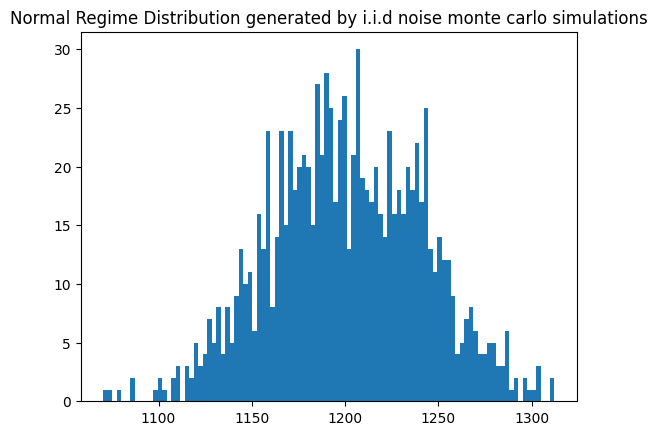

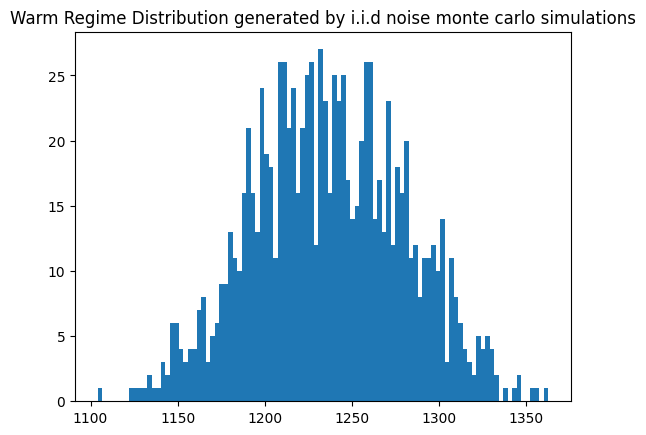

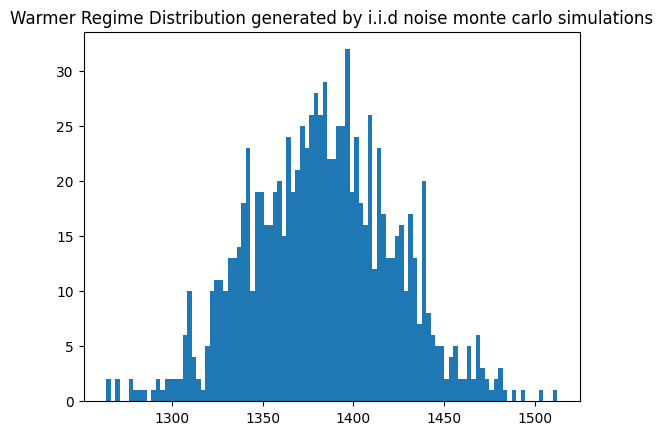

In [1084]:
normal_regime_dist = model1.regime_wise_cdd_kdes['normal']['kde']

x = normal_regime_dist.resample(1000).flatten()

plt.hist(x, 100)
plt.title('Normal Regime Distribution generated by i.i.d noise monte carlo simulations')
plt.show()

x2 = model1.regime_wise_cdd_kdes['warm']['kde'].resample(1000).flatten()

plt.hist(x2, 100)
plt.title('Warm Regime Distribution generated by i.i.d noise monte carlo simulations')
plt.show()


x3 = model1.regime_wise_cdd_kdes['warmer']['kde'].resample(1000).flatten()

plt.hist(x3, 100)
plt.title('Warmer Regime Distribution generated by i.i.d noise monte carlo simulations')
plt.show()

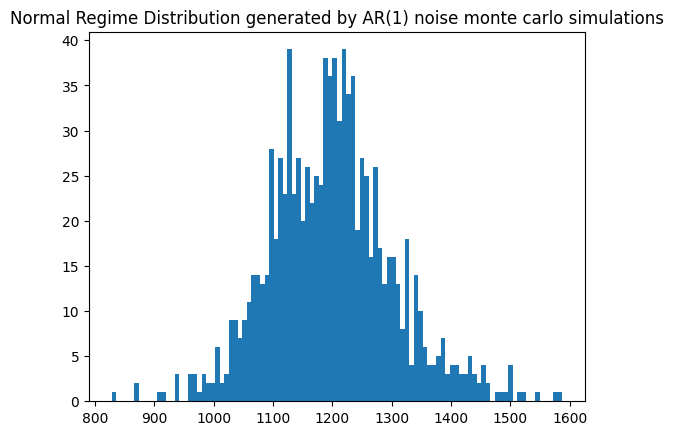

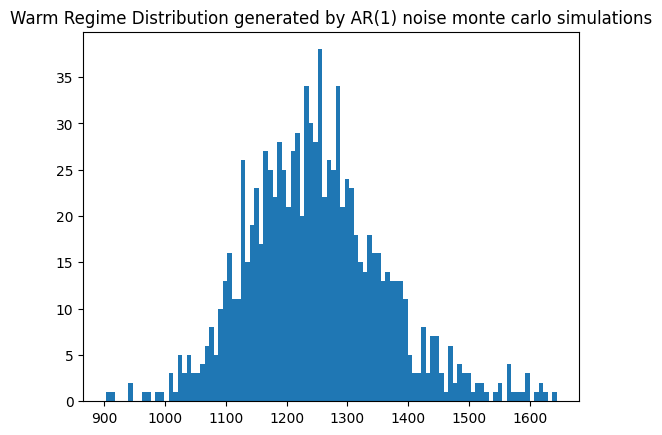

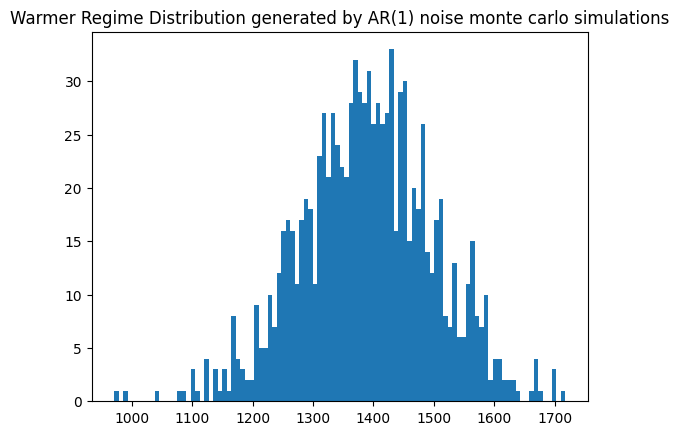

In [1085]:
normal_regime_dist = model2.regime_wise_cdd_kdes['normal']['kde']

x = normal_regime_dist.resample(1000).flatten()

plt.hist(x, 100)
plt.title('Normal Regime Distribution generated by AR(1) noise monte carlo simulations')
plt.show()

x2 = model2.regime_wise_cdd_kdes['warm']['kde'].resample(1000).flatten()

plt.hist(x2, 100)
plt.title('Warm Regime Distribution generated by AR(1) noise monte carlo simulations')
plt.show()


x3 = model2.regime_wise_cdd_kdes['warmer']['kde'].resample(1000).flatten()

plt.hist(x3, 100)
plt.title('Warmer Regime Distribution generated by AR(1) noise monte carlo simulations')
plt.show()